# Bootstrapping the uncertainty in the median

The median is an appealing location parameter as it is more robust to outliers in the sample.

For the average, the error in the mean goes as $\sigma/ \sqrt{N}$, how does this compare to the median?

The error in the median goes as $\sigma \sqrt{\frac{\pi}{2N}}$, see https://en.wikipedia.org/wiki/Efficiency_(statistics)#Example:_Median. 

We can bootstrap this result.

## Bootstrapping the error in the mean

First, lets generate random gaussian numbers. For this example I will use a $\sigma=1$ and zero mean.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import progressbar

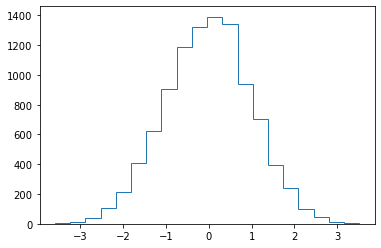

In [35]:
x = np.random.normal(0, 1, size=10000)
plt.hist(x, bins=20, histtype='step');

Lets check we are getting zero median and $\sigma=1$

In [21]:
print(np.median(x))
print(np.std(x))

-0.002317602294351605
1.0027908657125684


# Bootstrapping the median as a function of N

For this I will generate a gaussian random sample of varying length $n$. For each sample of length $n$ I will generate the bootstrap replicants $N_{boot}$ times and apply the median to extract the distribution of these.

In [22]:
def bootstrap(df, var, N_boot=1000, operator=np.mean):
    '''This function receives a dataframe df, and a column of interest (var).
    N_boot sets the number of bootstrap iterations.
    operator: sets the stastic to apply to all the replicants.'''
    bootstrapped = np.zeros(N_boot)
    for j in range(N_boot):
        df_bootstrapped = df.sample(n=len(df), replace=True)
        bootstrapped[j] = operator(df_bootstrapped[var].values)
    return np.std(bootstrapped)

Lets run this for $n=10..10^7$

In [40]:
n_min = 10
n_max = 5e7
N_list = np.logspace(np.log10(n_min), np.log10(n_max), 20)

In [41]:
se_mean = []
se_median = []
for N in progressbar.progressbar(N_list):
    x = np.random.normal(0, 1, size=int(N))
    df = pd.DataFrame({'x': x})
    se_mean.append(bootstrap(df, 'x', operator=np.mean))
    se_median.append(bootstrap(df, 'x', operator=np.median))
se_median = np.array(se_median)
se_mean = np.array(se_mean)

100% (20 of 20) |########################| Elapsed Time: 3:05:50 Time:  3:05:50


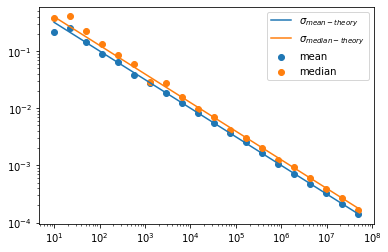

In [45]:
n = np.linspace(n_min, n_max, 30)
y_mean = 1/np.sqrt(n)
y_median = np.sqrt(np.pi/(2*n))

plt.scatter(N_list, se_mean, label='mean')
plt.scatter(N_list, se_median, label='median')

plt.plot(n, y_mean, label='$\sigma_{mean-theory}$')
plt.plot(n, y_median, label='$\sigma_{median-theory}$')

plt.xscale('log')
plt.yscale('log')
plt.legend()

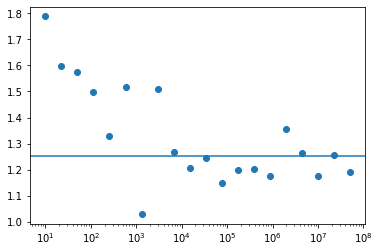

In [46]:
plt.scatter(N_list, se_median/se_mean)
plt.axhline(np.sqrt(np.pi/2))
plt.xscale('log')